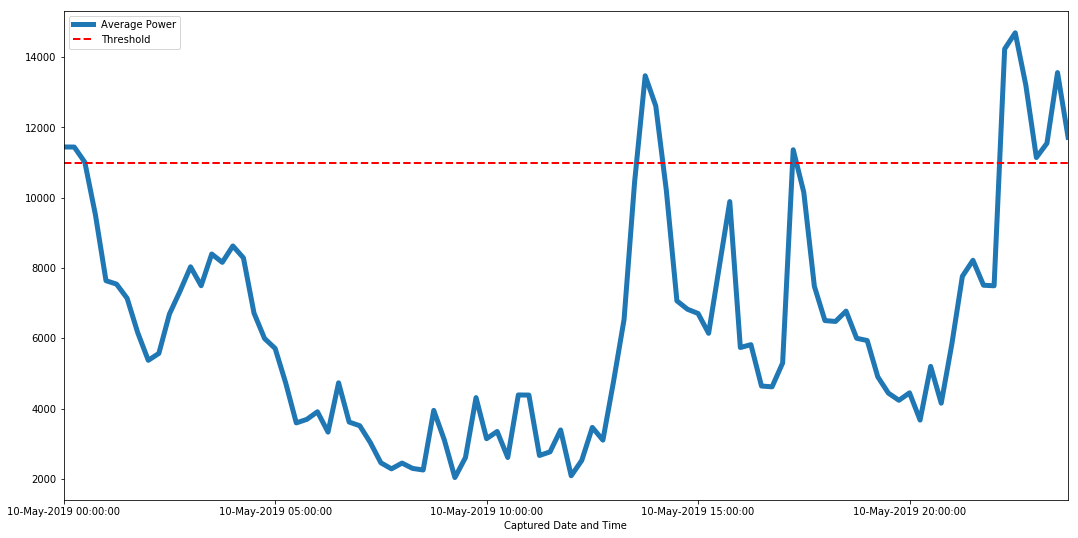

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def summation(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10):
  sx = pd.DataFrame()
  sx['Average Power'] = s1['Average Power'] +s2['Average Power'] +s3['Average Power'] +s4['Average Power'] +s5['Average Power'] +s6['Average Power'] +s7['Average Power'] +s8['Average Power'] +s9['Average Power'] +s10['Average Power'] 
  sx['Captured Date and Time'] = s1['Captured Date and Time']
  return sx

def preprocessing(sheet):
  
  data = pd.read_csv(sheet)
  data1 = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4',	'Unnamed: 5'],axis=1)
  data2 = data1.drop(index=[0])
  data3 = data2.rename(columns={'Unnamed: 0':'Sr Number:','Unnamed: 1':'Captured Date and Time','Unnamed: 6':'Active Energy(kWh) Import',\
                     'Unnamed: 7':'Active Energy(kWh) Export','Unnamed: 8':'Apparent Energy(kVAh)	Import','Unnamed: 9':'Apparent Energy(kVAh)	Export',\
                     'Unnamed: 10':'Average Voltage(V)','Unnamed: 11':'Average Current(A)','Unnamed: 12':'Neutral Current(A)','Unnamed: 13':'Status Byte'})
  data4 = data3.drop(index=[1,2,3])
  data5 = data4
  data5.head()
  data5['Average Current(A)'] = data5['Average Current(A)'].astype('float64')
  data5['Average Voltage(V)'] = data5['Average Voltage(V)'].astype('float64')
  data5['Average Power'] = (data5['Average Current(A)']*data5['Average Voltage(V)']).astype('float64')
  return data5[['Captured Date and Time', 'Average Power']]

s1 = preprocessing('sheet1.csv')
s2 = preprocessing('sheet2.csv')
s3 = preprocessing('s3.csv')
s4 = preprocessing('s4.csv')
s5 = preprocessing('s5.csv')
s6 = preprocessing('s6.csv')
s7 = preprocessing('s7.csv')
s8 = preprocessing('s8.csv')
s9 = preprocessing('s9.csv')
s10 = preprocessing('s10.csv')

x = summation(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10).iloc[-96:]

x.plot.line(x = 'Captured Date and Time', y = 'Average Power',  figsize=(18,9), linewidth=5, fontsize=10)
#plt.xticks(np.arange(5), ('00:00:00', '05:00:00', '10:00:00','15:00:00','20:00:00'))
plt.axhline(y=11000, color='r', linestyle='dashed',linewidth=2, label ="Threshold")
plt.legend()
plt.show()
#s1.plot.line(x = 'Captured Date and Time', y = 'Average Power',  figsize=(18,9), linewidth=5, fontsize=10)
 # plt.show()


  